In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
tail_data_path='/scratch/tcastigl/data/tailfindr_res'
ONT_signal_path='/scratch/tcastigl/data/pkl_data'
tail_files=os.listdir(tail_data_path)
ONT_files=os.listdir(ONT_signal_path)

In [3]:
couples=[]
count=0
all=0
for tailfile in tail_files:
    tryone=tailfile[:-4]
    if tryone+'_df.pkl' in ONT_files:
        couples.append([os.path.join(tail_data_path,tailfile),os.path.join(ONT_signal_path,(tryone+'_df.pkl'))])
        count +=1
    all+=1
print(count/all)
print(len(couples))
couples_adapt=[['/scratch/tcastigl/data/tailfindr_res/m6A_59.csv', '/scratch/tcastigl/data/pkl_data/m6A_59_df.pkl'],
              ['/scratch/tcastigl/data/tailfindr_res/m5C_5.csv', '/scratch/tcastigl/data/pkl_data/m5C_5_df.pkl'],
              ['/scratch/tcastigl/data/tailfindr_res/UNM_10.csv', '/scratch/tcastigl/data/pkl_data/UNM_10_df.pkl'],
              ['/scratch/tcastigl/data/tailfindr_res/pU_2.csv', '/scratch/tcastigl/data/pkl_data/pU_2_df.pkl'],
              ['/scratch/tcastigl/data/tailfindr_res/h5mC_1.csv', '/scratch/tcastigl/data/pkl_data/h5mC_1_df.pkl']]
              

0.8454545454545455
93


['/scratch/tcastigl/data/tailfindr_res/m5C_5.csv', '/scratch/tcastigl/data/pkl_data/m5C_5_df.pkl']
---------------doing-------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 0 to 998
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   read_id  940 non-null    object  
 1   signal   940 non-null    object  
 2   dataset  940 non-null    category
dtypes: category(1), object(2)
memory usage: 23.1+ KB
None


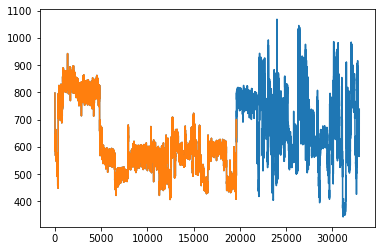

In [4]:
couple=couples_adapt[1]
print(couple)
tailfindres_df=pd.read_csv(couple[0])
tailfindres_df['read_id'] ='read_'+tailfindres_df['read_id'].astype(str)
ONT_df=pd.read_pickle(couple[1])
#ONT_df=ONT_df[['read_id', 'type', 'signal']]
#print(f'tailfindr shape {tailfindres_df.shape}')
#print(f'ONT shape {ONT_df.shape}')
adapt_df=pd.DataFrame()
if ONT_df.shape[0] != 0:
    merged_df=ONT_df.merge(tailfindres_df,how='inner',on='read_id').head(1000)
    if merged_df.shape[0] != 0:
        print('---------------doing-------------')
        #print(ONT_df.info())
        #merged_df=ONT_df.merge(tailfindres_df,how='inner',on='read_id')
        merged_df=merged_df.dropna()
        signal_pre=merged_df.loc[0,'signal']
        merged_df.signal = merged_df.apply(lambda row: row.signal[:int(row.tail_start)], axis=1) #keeping only adapter
        signal_post=merged_df.loc[0,'signal']
        plt.plot(range(len(signal_pre)),signal_pre)
        plt.plot(range(len(signal_post)),signal_post)
        merged_df['signal_length']=merged_df['signal'].str.len()
        merged_df=merged_df.drop(merged_df[merged_df['signal_length'] < 200].index)
        merged_df=merged_df.drop(merged_df[merged_df['signal_length'] > 2e4].index)

        adapt_df=adapt_df.append(merged_df[['read_id','signal','type']])
        adapt_df = adapt_df.assign(type='UNM')
        adapt_df=adapt_df.astype({'type':'category'})
        adapt_df=adapt_df.rename(columns={'type':'dataset'})
        print(adapt_df.info())

In [6]:
adapt_df.dataset.unique()

['UNM']
Categories (1, object): ['UNM']

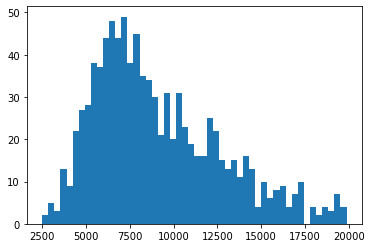

In [7]:
plt.hist(class_df.signal.apply(len), bins=50)
plt.show()

In [8]:
couple= ['/scratch/tcastigl/data/tailfindr_res/UNM_1.csv', '/scratch/tcastigl/data/pkl_data/UNM_1_df.pkl']
tailfindres_df=pd.read_csv(couple[0]) 
tailfindres_df['read_id'] ='read_'+tailfindres_df['read_id'].astype(str)
ONT_df=pd.read_pickle(couple[1])
#ONT_df=ONT_df[['read_id', 'type', 'signal']]
print(f'tailfindr shape {tailfindres_df.shape}')
print(f'ONT shape {ONT_df.shape}')
print(tailfindres_df.head())
print(ONT_df.head())
print(tailfindres_df.loc[31,'file_path'])
if ONT_df.shape[0] != 0 :
    print('---------------doing-------------')
    #print(ONT_df.info())
    merged_df=ONT_df.merge(tailfindres_df,how='inner',on='read_id')
    print(merged_df.info())
    merged_df=merged_df.dropna()
    for i, row in merged_df.iterrows():
        print(i)
        if len(row.signal) <= row.tail_end:
            print('dropping',i)
            merged_df=merged_df.drop(row, axis=0)
    #merged_df.signal = merged_df.apply(lambda row: row.signal[int(row.tail_end):], axis=1) #cutting adapter

tailfindr shape (10000, 6)
ONT shape (10000, 10)
                                     read_id  tail_start  tail_end  \
0  read_00151439-4313-4981-ac06-a9e36a6ba3b9      6506.0    8106.0   
1  read_0066ed6d-9bde-4eb0-bc7a-6c75a44a5b50     10475.0   12000.0   
2  read_0000fa54-9bcd-4e3c-877c-57a6daae0e59     12628.0   13853.0   
3  read_0059cbd8-da2a-436a-b423-af1ea60c3e42     18961.0   21461.0   
4  read_01698970-e569-409a-8225-d90293dc46d1     10901.0   13076.0   

   samples_per_nt  tail_length  \
0           43.30        31.95   
1           39.64        33.47   
2           34.01        31.02   
3           48.76        46.27   
4           35.95        55.51   

                                           file_path  
0  /scratch/ONT_samuel/Novoa/25062020/data/UNM/54...  
1  /scratch/ONT_samuel/Novoa/25062020/data/UNM/54...  
2  /scratch/ONT_samuel/Novoa/25062020/data/UNM/54...  
3  /scratch/ONT_samuel/Novoa/25062020/data/UNM/54...  
4  /scratch/ONT_samuel/Novoa/25062020/data/UNM/54.

In [13]:
for couple in couples[11:12]:
    print(couple)
    
    tailfindres_df=pd.read_csv(couple[0]) 
    tailfindres_df['read_id'] ='read_'+tailfindres_df['read_id'].astype(str)
    ONT_df=pd.read_pickle(couple[1])
    if ONT_df.shape[0] != 0:
        ONT_df=ONT_df[['read_id', 'type', 'signal']]

        merged_df=ONT_df.merge(tailfindres_df,how='inner',on='read_id')
        merged_df=merged_df.dropna()
        merged_df.signal = merged_df.apply(lambda row: row.signal[int(row.tail_end):], axis=1) #cutting adapter
        merged_df['signal_length']=merged_df['signal'].str.len()
        merged_df=merged_df.drop(merged_df[merged_df['signal_length'] < 4000].index)
        merged_df=merged_df.drop(merged_df[merged_df['signal_length'] > 2e5].index)
        class_df=merged_df[['read_id','signal','type']]
        class_df=class_df.astype({'type':'category'})
        print(class_df.dtypes)
        #class_df=class_df.rename(columns={'type':'dataset'})
        #X_train, X_test = train_test_split(class_df, test_size=0.1, random_state=42, stratify=class_df.dataset)
        #X_train, X_val = train_test_split(X_train, test_size=0.1, random_state=42, stratify=X_train.dataset)

        #X_train.to_pickle(f'/scratch/tcastigl/data/classification_dataset/train/{couple[0][37:-4]}_train.pkl')
        #X_val.to_pickle(f'/scratch/tcastigl/data/classification_dataset/val/{couple[0][37:-4]}_val.pkl')
        #X_test.to_pickle(f'/scratch/tcastigl/data/classification_dataset/test/{couple[0][37:-4]}_test.pkl')

['/scratch/tcastigl/data/tailfindr_res/m5C_5.csv', '/scratch/tcastigl/data/pkl_data/m5C_5_df.pkl']
read_id      object
signal       object
type       category
dtype: object


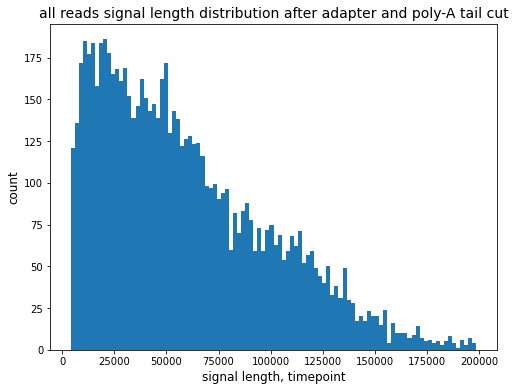

In [15]:
plt.figure(figsize=(8,6))
plt.title('all reads signal length distribution after adapter and poly-A tail cut', fontsize=14)
plt.hist(ONT_df.signal.apply(len),bins=100)
plt.xlabel('signal length, timepoint', fontsize=12)
plt.ylabel('count', fontsize=12)
#plt.savefig('plots/lengths_distr.png')
plt.show()

In [ ]:
#now create classification dataset. how?